**Nama : Nania Azzahra**

**NPM : 2310631170037**
    
**Kelas : 5A Informatika**

# **Mengunduh Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [ ]:
!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

--2025-10-06 09:51:41--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.03s   

2025-10-06 09:51:41 (18.5 MB/s) - ‘used_cars_price_fiks.csv’ saved [602640/602640]



In [ ]:
df = pd.read_csv('used_cars_price_fiks.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# **Tahap Preprocessing**

**a. Profiling Data atau Preparation Data**

In [ ]:
df.info()
df.describe()

print(df.isnull().sum())
print("Jumlah duplikasi:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB
Unnamed: 0             0
Name                   0
Location               0
Year                   0
Kilometer

**b. Exploratory Data Analysis (EDA)**

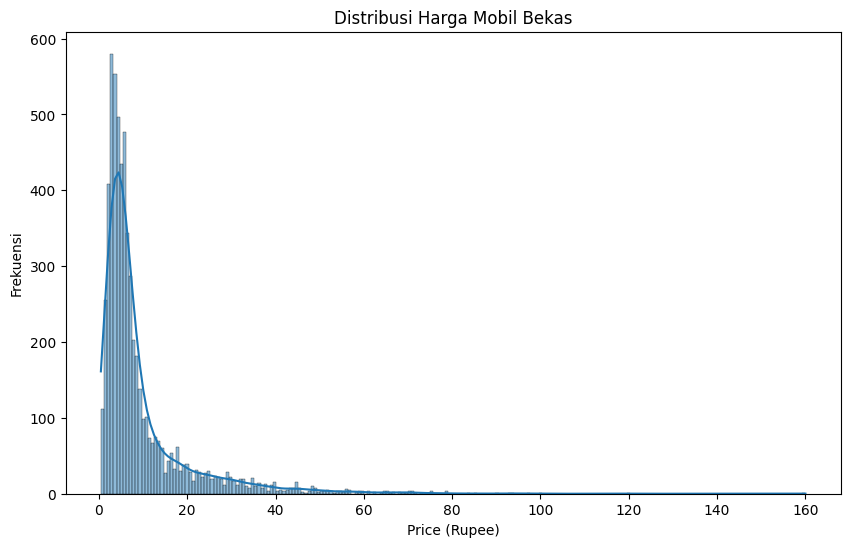

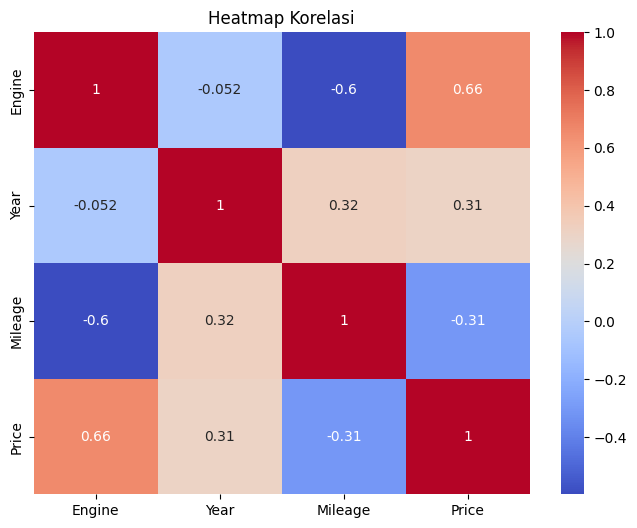

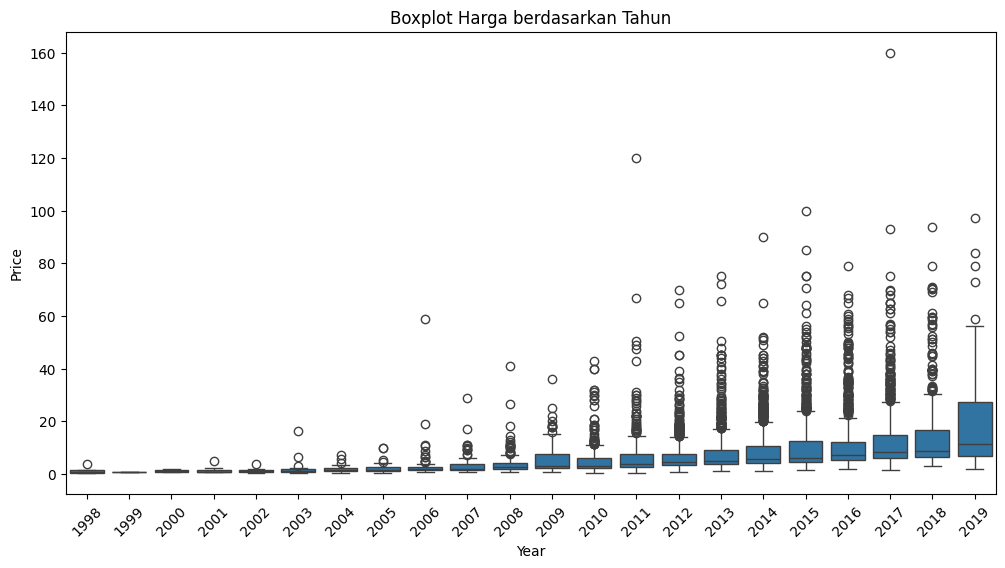

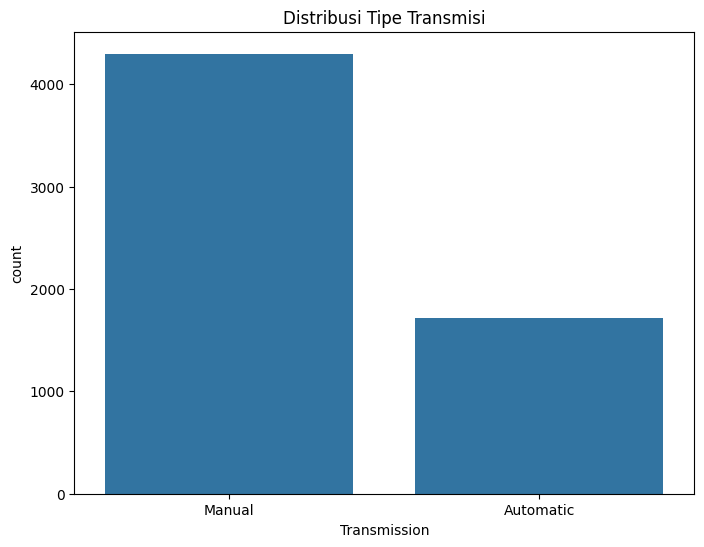

In [ ]:
# Distribusi harga (target)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribusi Harga Mobil Bekas')
plt.xlabel('Price (Rupee)')
plt.ylabel('Frekuensi')
plt.show()

# Korelasi antar variabel numerik
numerical_cols = ['Engine', 'Year', 'Mileage', 'Price']
corr = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# Boxplot untuk deteksi outlier pada price berdasarkan year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Price', data=df)
plt.title('Boxplot Harga berdasarkan Tahun')
plt.xticks(rotation=45)
plt.show()

# Countplot untuk variabel kategorikal, misalnya transmission
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Distribusi Tipe Transmisi')
plt.show()

**c. Data Cleaning**

In [ ]:
df = df.drop_duplicates()

numerical_cols_for_cleaning = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats'] # Exclude 'Unnamed: 0', 'Year', 'Price' from imputation
categorical_cols_for_cleaning = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for col in numerical_cols_for_cleaning:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

for col in categorical_cols_for_cleaning:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)


print("Dataset after cleaning:", df.shape)

Dataset after cleaning: (5301, 12)


**d. Data Transformations**

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

numerical_cols = [col for col in X.columns if col not in categorical_cols]

**e. Data Final (Pengecekan Ulang)**

In [ ]:
X.info()

X.describe()

print(X.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 5301 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5301 non-null   object 
 1   Location           5301 non-null   object 
 2   Year               5301 non-null   int64  
 3   Kilometers_Driven  5301 non-null   float64
 4   Fuel_Type          5301 non-null   object 
 5   Transmission       5301 non-null   object 
 6   Owner_Type         5301 non-null   object 
 7   Mileage            5301 non-null   float64
 8   Engine             5301 non-null   float64
 9   Power              5301 non-null   float64
 10  Seats              5301 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 497.0+ KB
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Pow

# **Tahap Modeling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor: OneHot untuk kategorikal, StandardScaler untuk numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Pipeline dengan Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name', 'Location',
                                                   'Fuel_Type', 'Transmission',
                                                   'Owner_Type'])])),
                ('regressor', LinearRegression())])

# **Tahap Evaluasi Model**

R2 Score: 0.7919847539517304
MAE: 1.1182977526999944
MSE: 3.489687566334706
RMSE: 1.8680705464020104


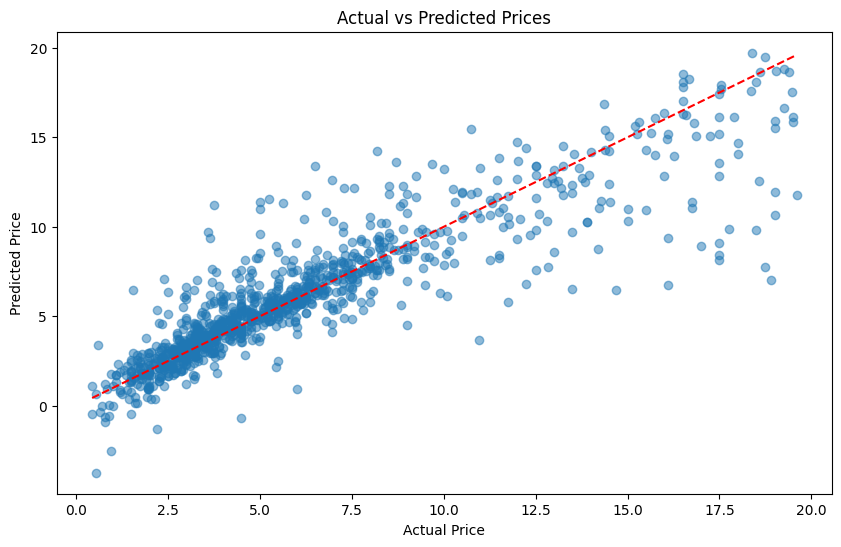

In [ ]:
#Prediksi
y_pred = model.predict(X_test)

# Evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()